<a href="https://colab.research.google.com/github/Putt2020/pytorch_beginner/blob/main/heart_disease_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
%matplotlib inline

In [33]:
random_state = 41

#Data Prep

In [3]:
# Visit https://www.kaggle.com/datasets/krishujeniya/heart-diseae/data
"""
Columns Description form Kaggle
target: 1 if the patient has heart disease, 0 otherwise
age: Age of the patient (in years)
sex: Sex of the patient (1 = male, 0 = female)
cp: Chest pain type (1-4)
trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
chol: Serum cholesterol in mg/dl
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg: Resting electrocardiographic results (0-2)
thalach: Maximum heart rate achieved
exang: Exercise-induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest
"""
df = pd.read_csv('/content/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
describe = df.describe()
describe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
wide_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
narrow_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


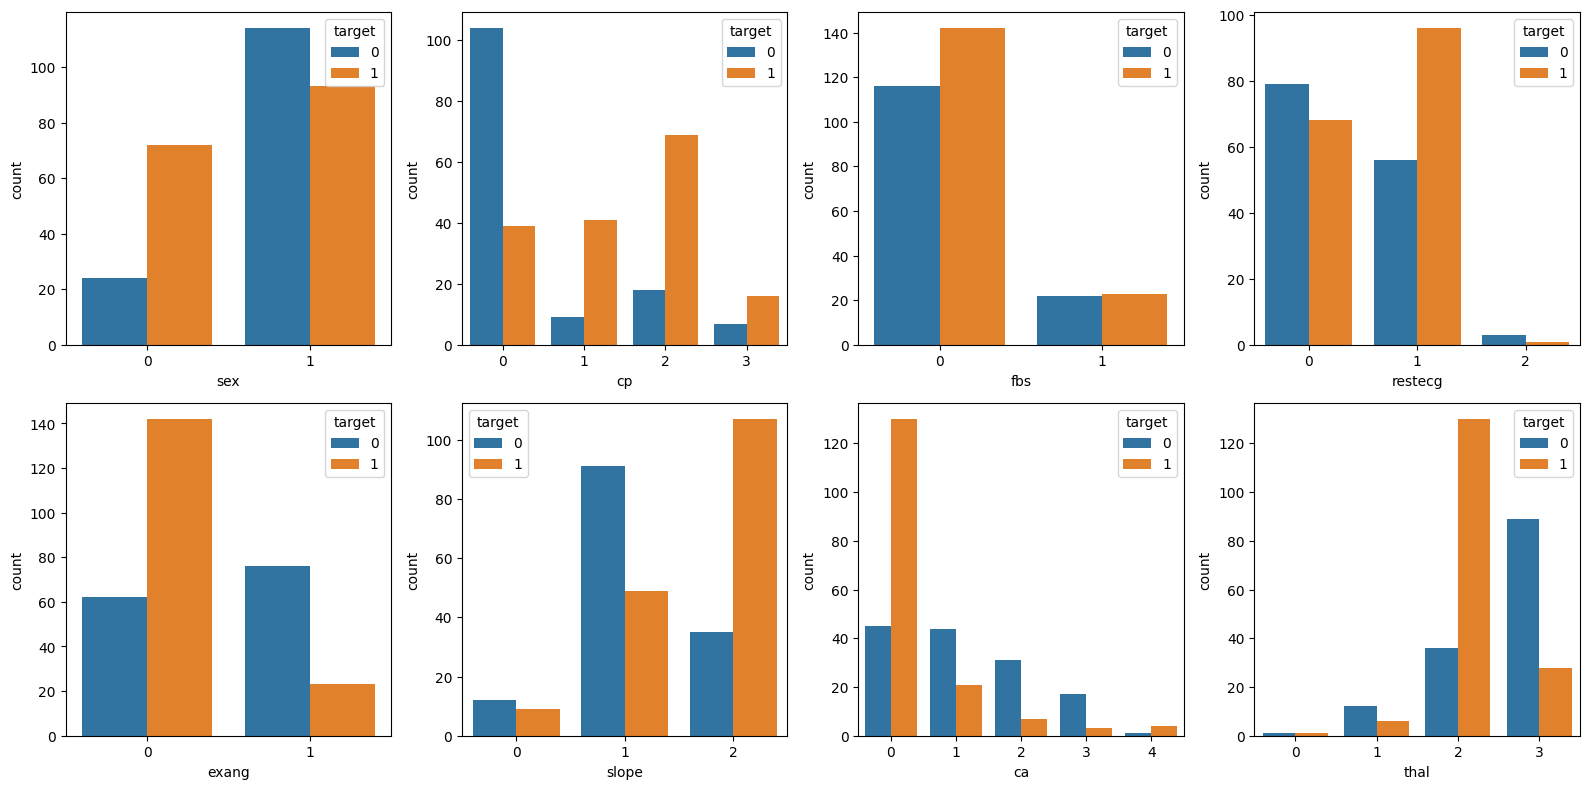

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
i,j = 0,0
for col in narrow_columns:
  sns.countplot(data=df, x=col, hue='target', ax=axs[i,j], legend='auto')
  j+=1
  if j>3:
    j=0
    i+=1
plt.tight_layout()

<Axes: >

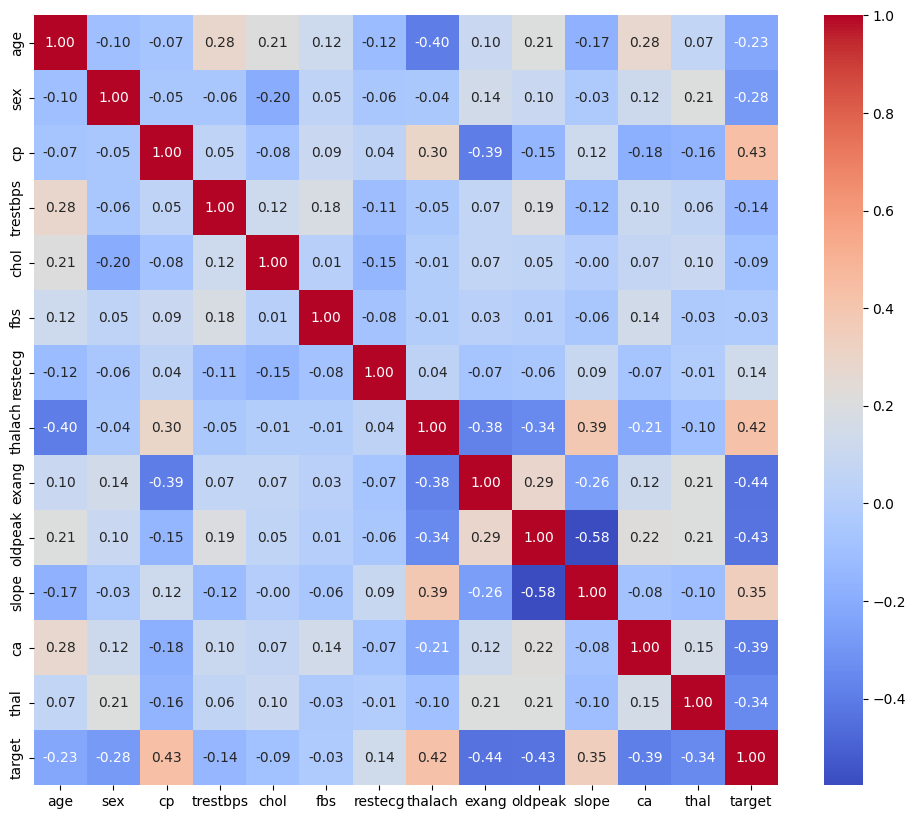

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
# plt.show()

<Axes: xlabel='slope', ylabel='oldpeak'>

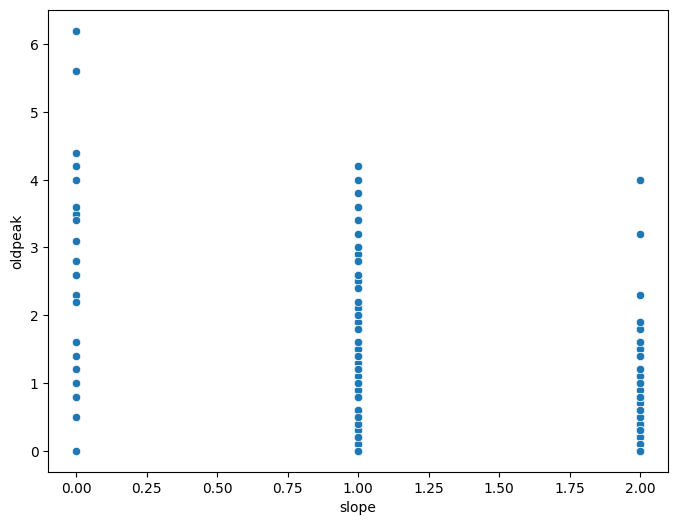

In [9]:
# Take a peak at oldpeak and slope
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x='slope', y='oldpeak', ax=ax)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, stratify=df['target'], random_state=random_state)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


#Model part

In [58]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 10.5 MB/s eta 0:00:00


In [59]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv  # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.datasets import make_classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier

##Decision Tree

###All feature

In [36]:
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 7, 10]}
base_estimator = DecisionTreeClassifier(random_state=random_state)
# X, y = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2).fit(X_train, y_train)
display(sh.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=41)

In [37]:
dtree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=random_state)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
imp_col = X_train.columns[dtree.feature_importances_ > 0.01]
print(classification_report(y_test,predictions))
print(f"importance feature are: {dtree.feature_importances_}")
print(f"importance columms are: {imp_col}")

              precision    recall  f1-score   support

           0       0.69      0.64      0.67        28
           1       0.71      0.76      0.74        33

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61

importance feature are: [0.09028269 0.03363653 0.32001921 0.06380737 0.08242362 0.
 0.         0.02017416 0.09700938 0.07471275 0.         0.14716888
 0.07076542]
importance columms are: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'ca', 'thal'],
      dtype='object')


###Selected feature(could be worse or better)

In [38]:
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 7, 10]}
base_estimator = DecisionTreeClassifier(random_state=random_state)
# X, y = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, # resource='n_estimators',
                         max_resources=40).fit(X_train[imp_col], y_train)
display(sh.best_estimator_)

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=41)

In [39]:
sh.best_estimator_.fit(X_train[imp_col],y_train)
predictions = sh.predict(X_test[imp_col])
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.61      0.69        28
           1       0.72      0.88      0.79        33

    accuracy                           0.75        61
   macro avg       0.77      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



##Linear Regression

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


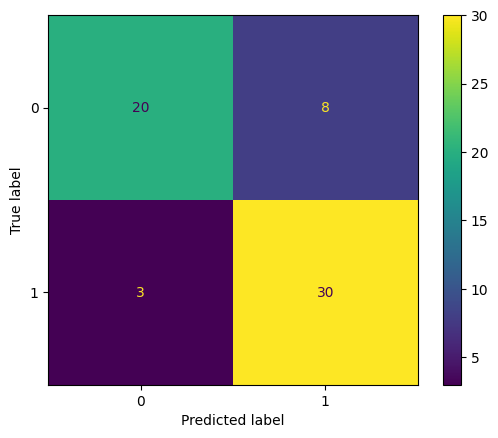

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(classification_report(y_test,predictions))

##Random Forest

In [41]:
param_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 7, 10]}
base_estimator = RandomForestClassifier(random_state=random_state)
# X, y = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=100).fit(X_train, y_train)
display(sh.best_estimator_)

RandomForestClassifier(max_depth=7, min_samples_split=10, n_estimators=96,
                       random_state=41)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



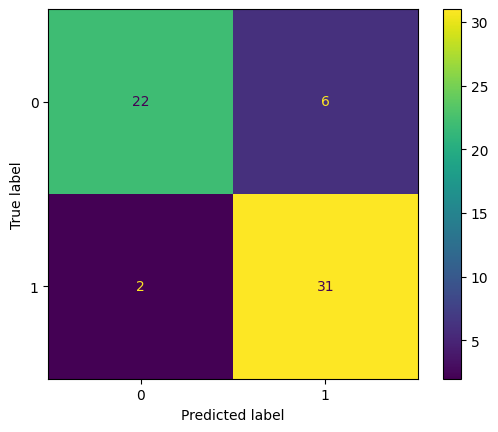

In [42]:
# prompt: Train Randomforestclassifier
sh.best_estimator_.fit(X_train,y_train)
predictions = sh.predict(X_test)
cm = confusion_matrix(y_test,predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(classification_report(y_test,predictions))

##XGBoost

In [67]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 3, 5, 7],
    'min_child_weight': [1, 3, 5]
}
base_estimator = XGBClassifier(random_state=random_state)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=3, verbose=0).fit(X_train, y_train)
display(sh.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=41, ...)

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



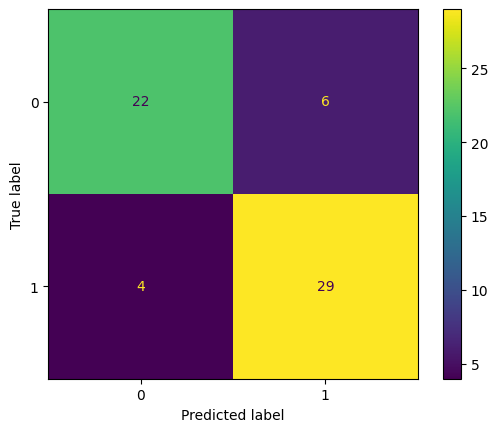

In [68]:
# sh.best_estimator_.fit(X_train, y_train)
predictions = sh.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test,predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(classification_report(y_test,predictions))

##CatBoost

In [69]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'l2_leaf_reg': [1, 3, 5]
}
base_estimator = CatBoostClassifier(random_state=random_state, verbose=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=3, verbose=0).fit(X_train, y_train)
display(sh.best_estimator_)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



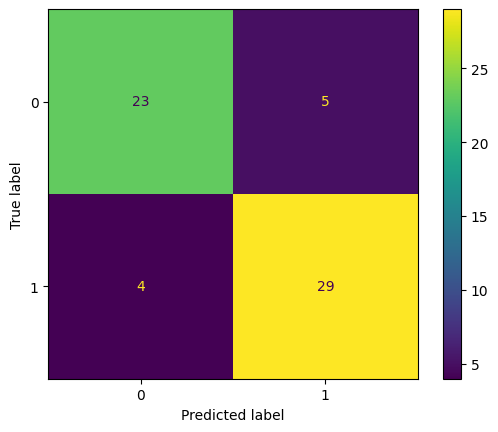

In [70]:
# sh.best_estimator_.fit(X_train, y_train)
predictions = sh.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test,predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(classification_report(y_test,predictions))

##Nueral Network

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [45]:
class NNModel(nn.Module):
    in_features = 13
    hidden1 = 100
    hidden2 = 50
    hidden3 = 20
    out_features = 2

    def __init__(self):
        super(NNModel, self).__init__()
        self.lin1 = nn.Linear(self.in_features, self.hidden1)
        self.lin2 = nn.Linear(self.hidden1, self.hidden2)
        self.lin3 = nn.Linear(self.hidden2, self.hidden3)
        self.out = nn.Linear(self.hidden3, self.out_features)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        self.dropout(x)
        x = F.relu(self.lin3(x))
        x = self.out(x)
        return x

In [46]:
torch.manual_seed(random_state)
model = NNModel()

In [47]:
criteria = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=50, gamma=0.4)

In [48]:
X_train_tensor = torch.FloatTensor(X_train.values)
X_test_tensor = torch.FloatTensor(X_test.values)
y_train_tensor = torch.LongTensor(y_train.values)
y_test_tensor = torch.LongTensor(y_test.values)

In [49]:
X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor = train_test_split(X_train_tensor, y_train_tensor, test_size=0.15, random_state=random_state)
print(X_train_tensor.shape, X_val_tensor.shape, y_train_tensor.shape, y_val_tensor.shape)

torch.Size([205, 13]) torch.Size([37, 13]) torch.Size([205]) torch.Size([37])


In [50]:
epochs = 300
train_losses = []
val_losses = []
Models = []
for i in range(epochs):
    y_pred = model(X_train_tensor) #Go forward and get prediction
    loss = criteria(y_pred, y_train_tensor) #Measure error/loss, should be lower each epoch
    train_losses.append(loss.item()) #Tracking loss

    # validation data
    Y_hat = model(X_val_tensor)
    val_loss = criteria(Y_hat, y_val_tensor)
    val_losses.append(val_loss.item())
    Models.append(model)

    if i % 20 == 19:
        print(f"Epoch {i+1} has loss: {loss}")

    # These process will back propagation weight for fine tune layers
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

Epoch 20 has loss: 0.6721630096435547
Epoch 40 has loss: 0.5651781558990479
Epoch 60 has loss: 0.5227176547050476
Epoch 80 has loss: 0.48765894770622253
Epoch 100 has loss: 0.4214440584182739
Epoch 120 has loss: 0.3909265995025635
Epoch 140 has loss: 0.36149898171424866
Epoch 160 has loss: 0.34197622537612915
Epoch 180 has loss: 0.33344727754592896
Epoch 200 has loss: 0.32650065422058105
Epoch 220 has loss: 0.3239484131336212
Epoch 240 has loss: 0.32177671790122986
Epoch 260 has loss: 0.3202933073043823
Epoch 280 has loss: 0.31950196623802185
Epoch 300 has loss: 0.3187166452407837


Text(0.5, 0, 'Epoch')

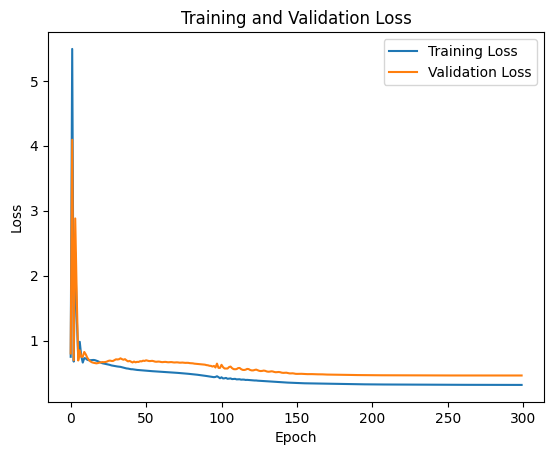

In [51]:
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [52]:
load_model = Models[np.argmin(val_losses)]
print(f"Best model is at index: {np.argmin(val_losses)}")

Best model is at index: 292


In [53]:
def accuracy(model, X_test_tensor, y_test_tensor):
    correct = 0
    predictions = []
    with torch.no_grad():
        for i, data in enumerate(X_test_tensor):
            #predict data
            y_val = y_test_tensor[i]
            y_hat = load_model.forward(data)
            predictions.append(y_hat.argmax().item())

            #show result
            # print(f"{i}\t{y_hat}\t{y_val} or {'risky' if y_val == 1 else 'not risky'}")

            #eval correctness
            if y_hat.argmax().item() == y_val.item():
                correct += 1

    predictions = np.array(predictions)
    print(f"Accuracy: {correct/len(y_test)}")

    cm = confusion_matrix(y_test,predictions)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    print(classification_report(y_test,predictions))

Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



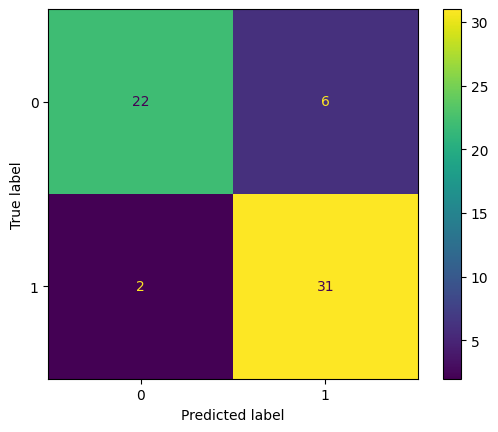

In [54]:
accuracy(model, X_test_tensor, y_test_tensor)

Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



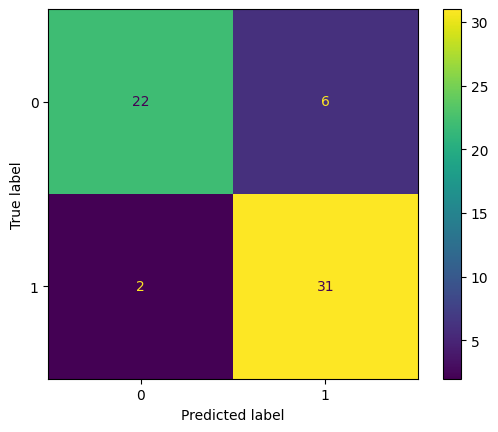

In [55]:
accuracy(load_model, X_test_tensor, y_test_tensor)

In [56]:
model == load_model

True